In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
a = ['29_marzo',
 '14_abril',
 '28_abril',
 '7_mayo',
 '12_mayo',
 '19_mayo',
 '26_mayo',
 '2_junio',
 '11_junio',
 '16_junio',
 '23_junio',
 '2_julio',
 '9_julio',
 '14_julio',
 '23_julio',
 '5_agosto',
 '13_agosto',
 '19_agosto',
 '15_setiembre',
 '24_setiembre',
 '15_octubre',
 '29_octubre',
 '12_noviembre',
 '26_noviembre']
flies_dict = {j:i for i, j in enumerate(a)}

In [23]:
data = np.load('ndvistats.npy', allow_pickle=True)

In [24]:
def to_df(data, key = 'SenteraNDVI'):
    mean = []
    std = []
    fly = []
    landmark = []
    for i in data:
        aux = i['SenteraNDVI']
        mean.append(aux['mean'])
        std.append(aux['std'])
        fly.append(flies_dict[(i['Date'])[:-2]])
        landmark.append(i['landmarks'][0])
    mean = np.array(mean)
    std = np.array(std)
    fly = np.array(fly)
    landmark = np.array(landmark)
    out = {'mean':mean, 'std':std, 'fly':fly, 'landmark':landmark}
    return pd.DataFrame(out)
        
        
        

In [25]:
ndvistat = to_df(data)

In [88]:
ndvistat['fly'].unique()

array([ 8,  4, 16,  1, 13])

## NITROGENO TOTAL

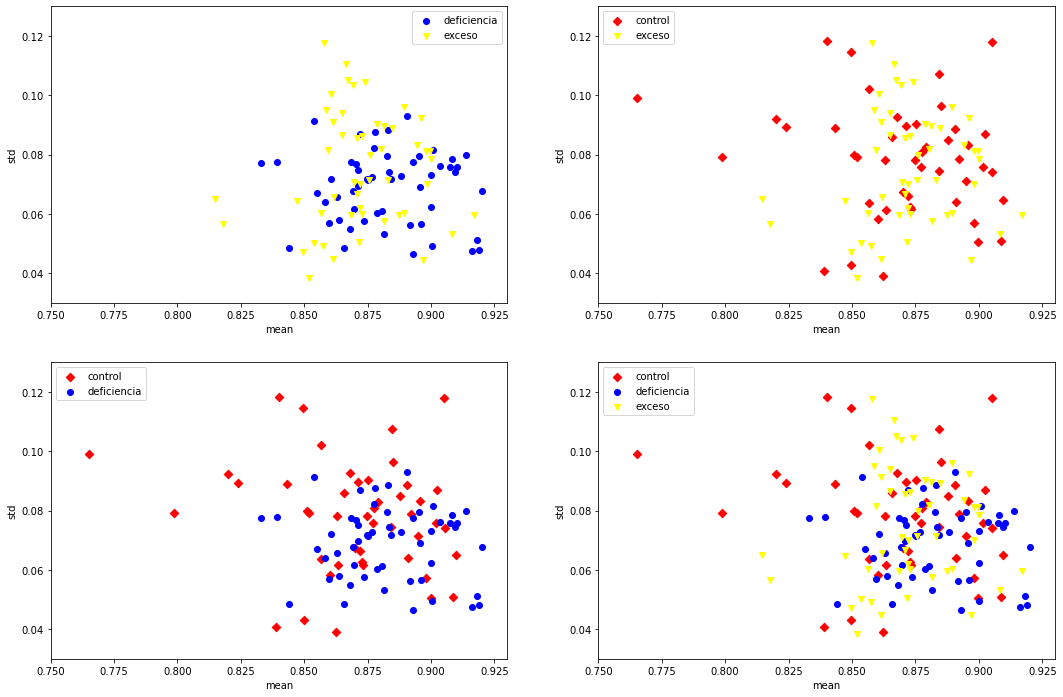

In [27]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Control'],ndvistat['std'][ndvistat.landmark == 'N_Control'],marker='D',color='red',label='Very Low')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Exceso'], ndvistat['std'][ndvistat.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.03,0.13))
plt.subplot(2,2,2)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Control'],ndvistat['std'][ndvistat.landmark == 'N_Control'],marker='D',color='red',label='control')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Exceso'], ndvistat['std'][ndvistat.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.03,0.13))
plt.subplot(2,2,3)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Control'],ndvistat['std'][ndvistat.landmark == 'N_Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Exceso'], ndvistat['std'][ndvistat.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.03,0.13))
plt.subplot(2,2,4)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Control'],ndvistat['std'][ndvistat.landmark == 'N_Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'N_Exceso'], ndvistat['std'][ndvistat.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.03,0.13))
plt.show()

## NITROGENO FECHAS

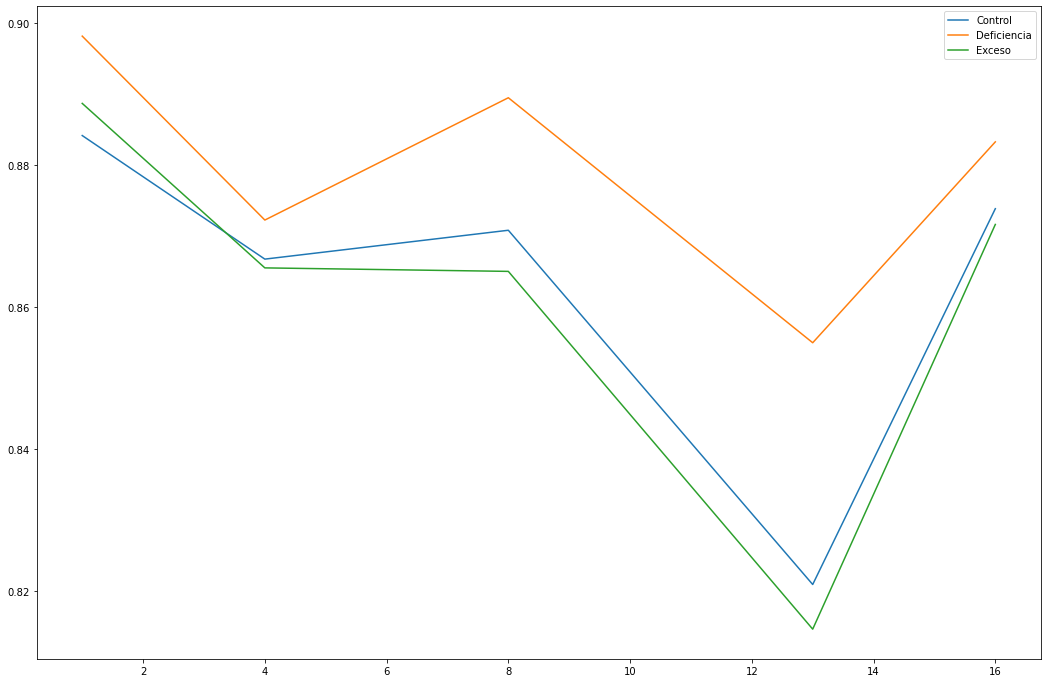

In [89]:
moutc = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='N_Control')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soutc = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='N_Control')]['std']).values) for i in list(ndvistat['fly'].unique())}
moute = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='N_Exceso')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soute = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='N_Exceso')]['std']).values) for i in list(ndvistat['fly'].unique())}
moutd = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='N_Deficiencia')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soutd = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='N_Deficiencia')]['std']).values) for i in list(ndvistat['fly'].unique())}
moutc = dict(sorted(moutc.items()))
soutc = dict(sorted(soutc.items()))
moute = dict(sorted(moute.items()))
soute = dict(sorted(soute.items()))
moutd = dict(sorted(moutd.items()))
soutd = dict(sorted(soutd.items()))
plt.plot(sorted(list(ndvistat['fly'].unique())), moutc.values(),sorted(list(ndvistat['fly'].unique())), moutd.values(),sorted(list(ndvistat['fly'].unique())), moute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

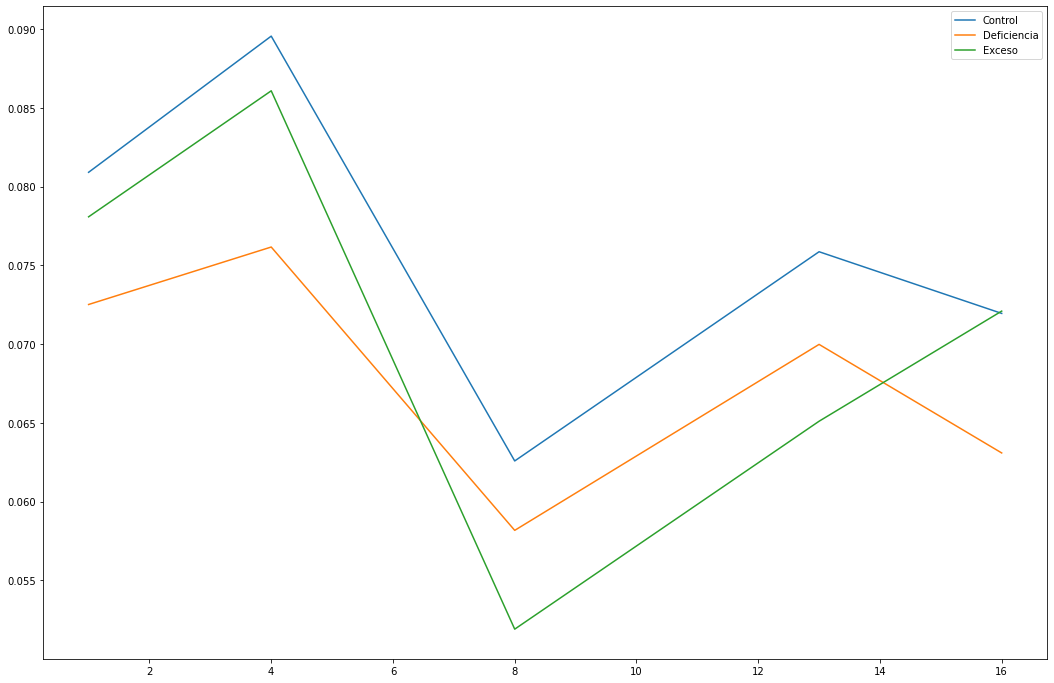

In [90]:
plt.plot(sorted(list(ndvistat['fly'].unique())), soutc.values(),sorted(list(ndvistat['fly'].unique())), soutd.values(),sorted(list(ndvistat['fly'].unique())), soute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

## FOSFORO TOTAL

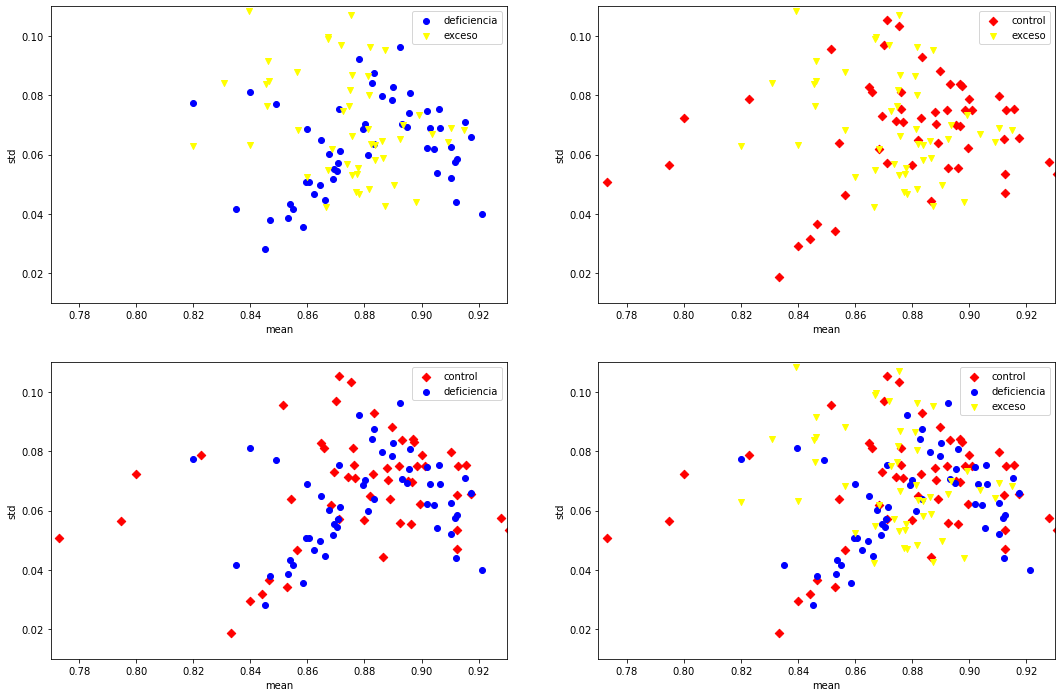

In [29]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Control'],ndvistat['std'][ndvistat.landmark == 'P_Control'],marker='D',color='red',label='Very Low')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Exceso'], ndvistat['std'][ndvistat.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.77,0.93,0.01,0.11))
plt.subplot(2,2,2)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Control'],ndvistat['std'][ndvistat.landmark == 'P_Control'],marker='D',color='red',label='control')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Exceso'], ndvistat['std'][ndvistat.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.77,0.93,0.01,0.11))
plt.subplot(2,2,3)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Control'],ndvistat['std'][ndvistat.landmark == 'P_Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Exceso'], ndvistat['std'][ndvistat.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.77,0.93,0.01,0.11))
plt.subplot(2,2,4)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Control'],ndvistat['std'][ndvistat.landmark == 'P_Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'P_Exceso'], ndvistat['std'][ndvistat.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.77,0.93,0.01,0.11))
plt.show()

## FOSFOR FECHAS

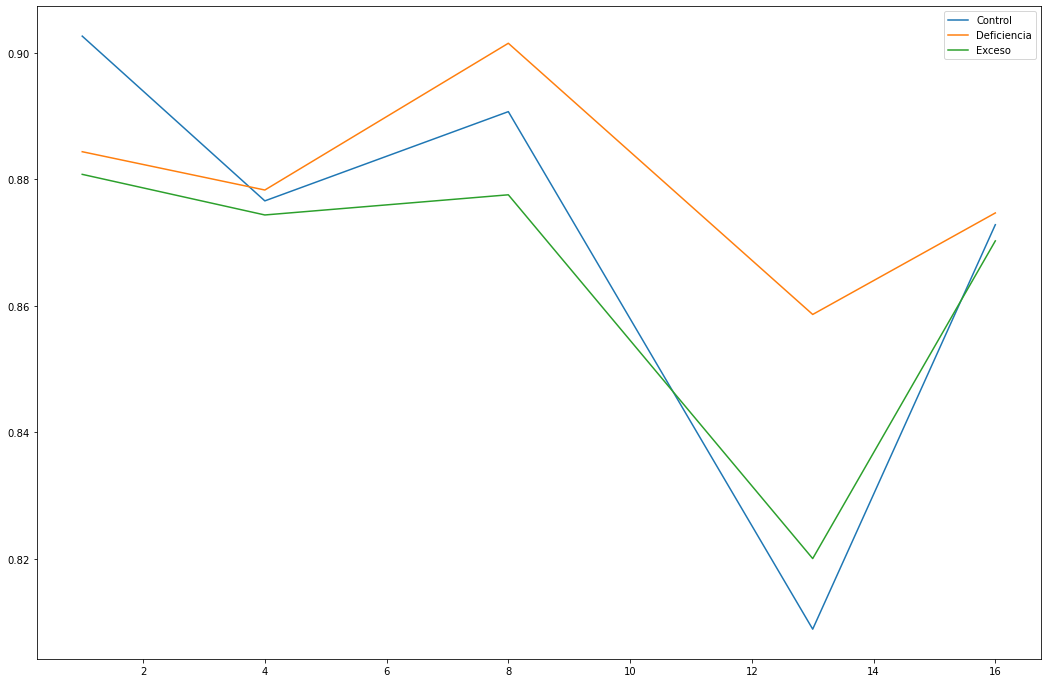

In [91]:
moutc = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='P_Control')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soutc = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='P_Control')]['std']).values) for i in list(ndvistat['fly'].unique())}
moute = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='P_Exceso')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soute = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='P_Exceso')]['std']).values) for i in list(ndvistat['fly'].unique())}
moutd = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='P_Deficiencia')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soutd = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='P_Deficiencia')]['std']).values) for i in list(ndvistat['fly'].unique())}
moutc = dict(sorted(moutc.items()))
soutc = dict(sorted(soutc.items()))
moute = dict(sorted(moute.items()))
soute = dict(sorted(soute.items()))
moutd = dict(sorted(moutd.items()))
soutd = dict(sorted(soutd.items()))
plt.plot(sorted(list(ndvistat['fly'].unique())), moutc.values(),sorted(list(ndvistat['fly'].unique())), moutd.values(),sorted(list(ndvistat['fly'].unique())), moute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

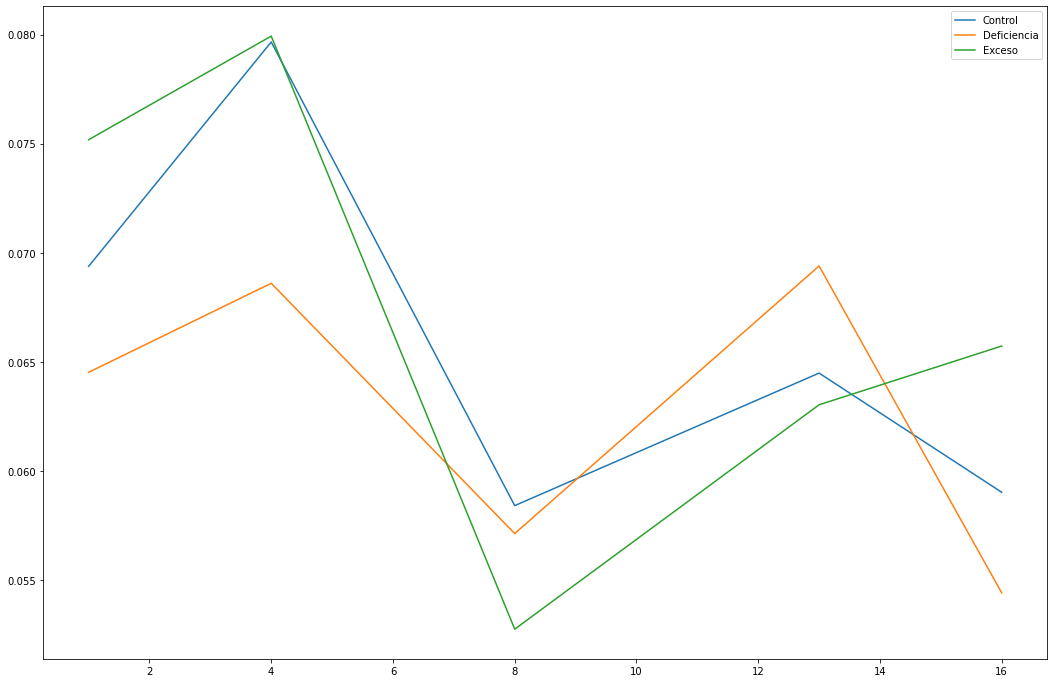

In [92]:
plt.plot(sorted(list(ndvistat['fly'].unique())), soutc.values(),sorted(list(ndvistat['fly'].unique())), soutd.values(),sorted(list(ndvistat['fly'].unique())), soute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

## POTASIO TOTAL

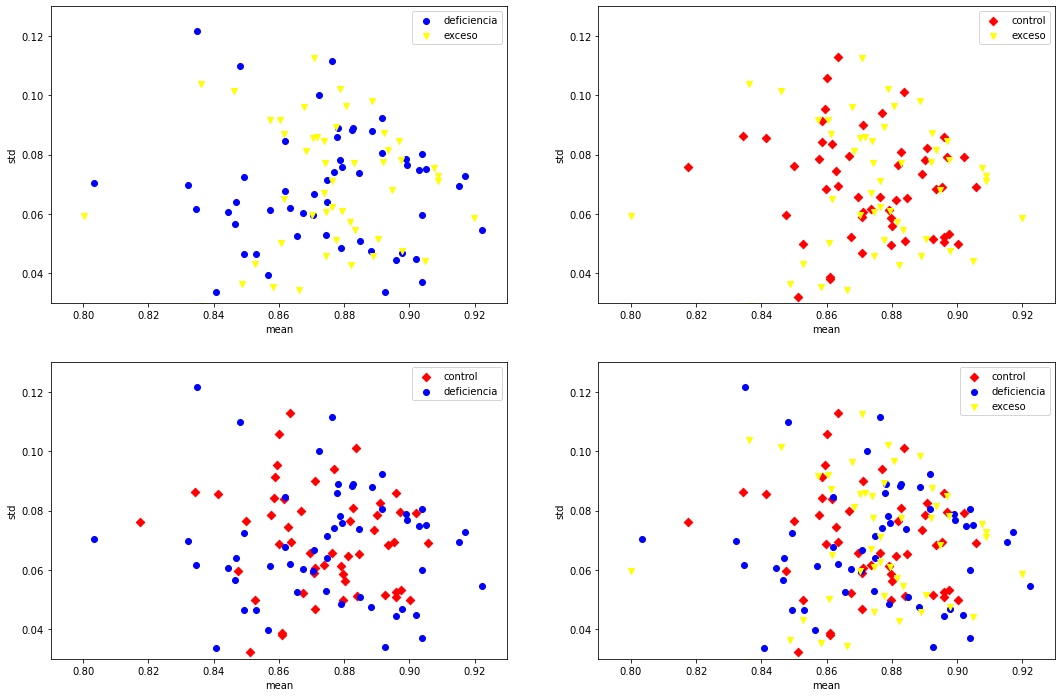

In [30]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Control'],ndvistat['std'][ndvistat.landmark == 'K_Control'],marker='D',color='red',label='Very Low')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Exceso'], ndvistat['std'][ndvistat.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.79,0.93,0.03,0.13))
plt.subplot(2,2,2)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Control'],ndvistat['std'][ndvistat.landmark == 'K_Control'],marker='D',color='red',label='control')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Exceso'], ndvistat['std'][ndvistat.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.79,0.93,0.03,0.13))
plt.subplot(2,2,3)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Control'],ndvistat['std'][ndvistat.landmark == 'K_Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Exceso'], ndvistat['std'][ndvistat.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.79,0.93,0.03,0.13))
plt.subplot(2,2,4)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Control'],ndvistat['std'][ndvistat.landmark == 'K_Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Deficiencia'],ndvistat['std'][ndvistat.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'K_Exceso'], ndvistat['std'][ndvistat.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.79,0.93,0.03,0.13))
plt.show()

## POTASIO FECHAS

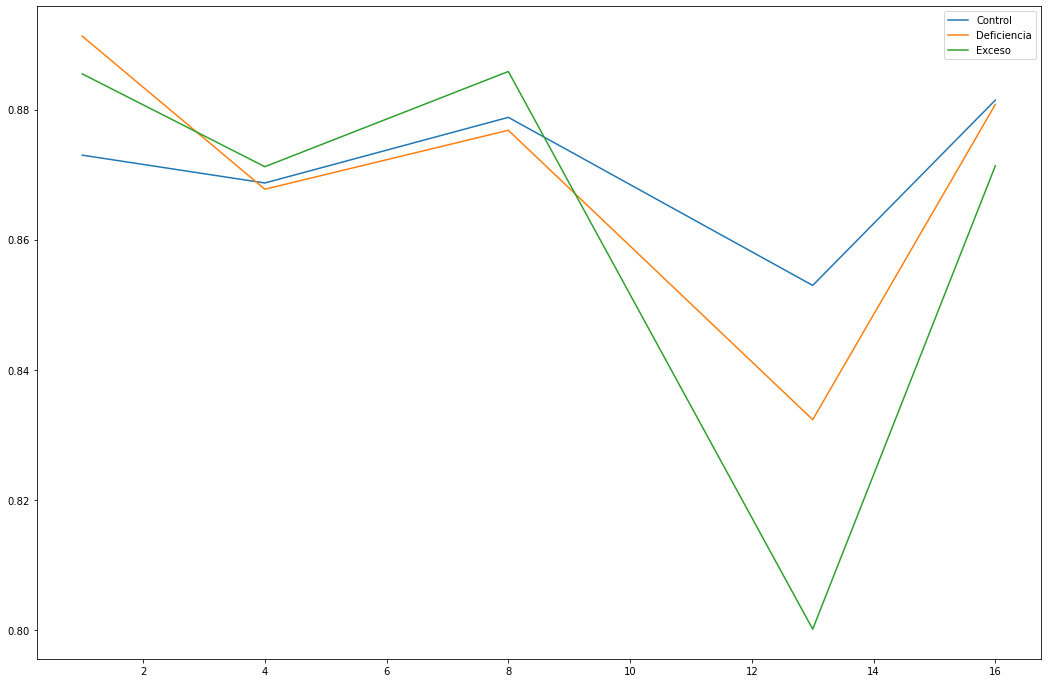

In [93]:
moutc = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='K_Control')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soutc = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='K_Control')]['std']).values) for i in list(ndvistat['fly'].unique())}
moute = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='K_Exceso')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soute = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='K_Exceso')]['std']).values) for i in list(ndvistat['fly'].unique())}
moutd = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='K_Deficiencia')]['mean']).values) for i in list(ndvistat['fly'].unique())}
soutd = {i:np.mean((ndvistat[(ndvistat['fly']==i) & (ndvistat['landmark']=='K_Deficiencia')]['std']).values) for i in list(ndvistat['fly'].unique())}
moutc = dict(sorted(moutc.items()))
soutc = dict(sorted(soutc.items()))
moute = dict(sorted(moute.items()))
soute = dict(sorted(soute.items()))
moutd = dict(sorted(moutd.items()))
soutd = dict(sorted(soutd.items()))
plt.plot(sorted(list(ndvistat['fly'].unique())), moutc.values(),sorted(list(ndvistat['fly'].unique())), moutd.values(),sorted(list(ndvistat['fly'].unique())), moute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

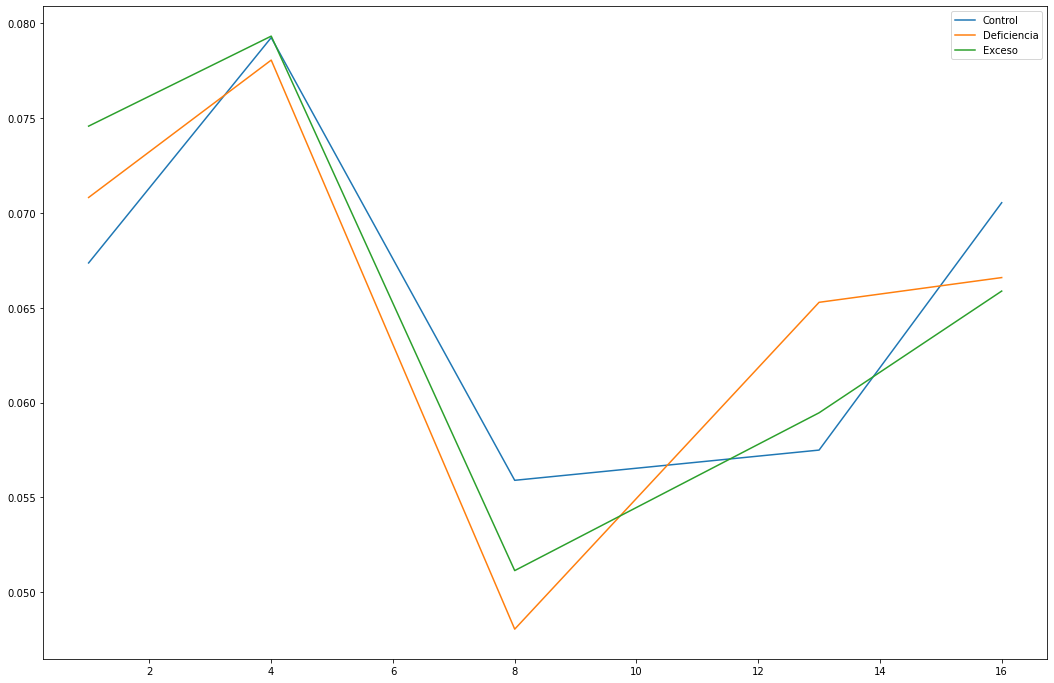

In [94]:
plt.plot(sorted(list(ndvistat['fly'].unique())), soutc.values(),sorted(list(ndvistat['fly'].unique())), soutd.values(),sorted(list(ndvistat['fly'].unique())), soute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

## HIDRICO

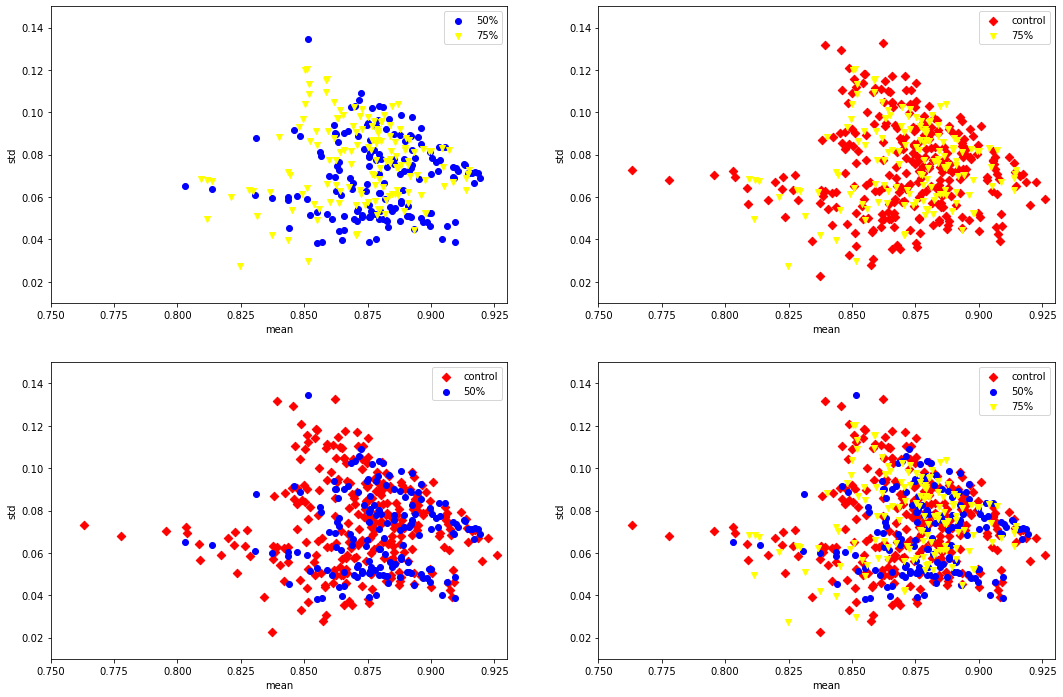

In [31]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'Control'],ndvistat['std'][ndvistat.landmark == 'Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H50%'],ndvistat['std'][ndvistat.landmark == 'H50%'], marker='o',color='blue',label='50%')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H75%'], ndvistat['std'][ndvistat.landmark == 'H75%'],marker='v',color='yellow',label='75%')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.01,0.15))
plt.subplot(2,2,2)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'Control'],ndvistat['std'][ndvistat.landmark == 'Control'],marker='D',color='red',label='control')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H50%'],ndvistat['std'][ndvistat.landmark == 'H50%'], marker='o',color='blue',label='50%')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H75%'], ndvistat['std'][ndvistat.landmark == 'H75%'],marker='v',color='yellow',label='75%')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.01,0.15))
plt.subplot(2,2,3)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'Control'],ndvistat['std'][ndvistat.landmark == 'Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H50%'],ndvistat['std'][ndvistat.landmark == 'H50%'], marker='o',color='blue',label='50%')
#plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H75%'], ndvistat['std'][ndvistat.landmark == 'H75%'],marker='v',color='yellow',label='75%')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.01,0.15))
plt.subplot(2,2,4)
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'Control'],ndvistat['std'][ndvistat.landmark == 'Control'],marker='D',color='red',label='control')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H50%'],ndvistat['std'][ndvistat.landmark == 'H50%'], marker='o',color='blue',label='50%')
plt.scatter(ndvistat['mean'][ndvistat.landmark == 'H75%'], ndvistat['std'][ndvistat.landmark == 'H75%'],marker='v',color='yellow',label='75%')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.axis((0.75,0.93,0.01,0.15))
plt.show()

In [13]:
import pickle

    b = pickle.load(handle)

In [18]:
with open('senteranircorrelation.pkl', 'rb') as handle:
    try:
        while True:
            print(pickle.load(handle))
    except EOFError:
        pass

{'Senteracorrelation': array([[0.49369672, 0.48680584],
       [0.42326797, 0.38641463],
       [0.39669341, 0.35355387]]), 'landmarks': array(['N_Control'], dtype='<U13'), 'Date': '11_junio_1'}
{'Senteracorrelation': array([[0.59616434, 0.60127193],
       [0.53239099, 0.51206331],
       [0.50777792, 0.46363975]]), 'landmarks': array(['P_Control'], dtype='<U13'), 'Date': '11_junio_1'}
{'Senteracorrelation': array([[0.81892759, 0.58003084],
       [0.80458027, 0.33600913],
       [0.80019813, 0.33231878]]), 'landmarks': array(['K_Control'], dtype='<U13'), 'Date': '11_junio_1'}
{'Senteracorrelation': array([[0.47020237, 0.47237361],
       [0.4087164 , 0.31453199],
       [0.37806767, 0.29534927]]), 'landmarks': array(['Control'], dtype='<U13'), 'Date': '11_junio_1'}
{'Senteracorrelation': array([[0.36616365, 0.36064414],
       [0.26604399, 0.20045658],
       [0.23137759, 0.15588368]]), 'landmarks': array(['H50%'], dtype='<U13'), 'Date': '11_junio_1'}
{'Senteracorrelation': array([[0